In [1]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2

Using TensorFlow backend.
/home/sonduong/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sonduong/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sonduong/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sonduong/.local/lib/python3.6/site-packages/tensorflo

In [23]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.3, 
height_shift_range=0.3,shear_range=0.15, 
zoom_range=0.4,channel_shift_range = 30, horizontal_flip=False, brightness_range=[0.1, 1.0])

In [187]:
image_path = '/home/sonduong/WS/cuoc-dua-so/data/train/left/left.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.expand_dims(image, 0)


In [188]:
save_here = '/home/sonduong/WS/cuoc-dua-so/data/train/left'
datagen.fit(image)


In [189]:
for x, val in zip(datagen.flow(image,                    #image we chose
        save_to_dir=save_here,     #this is where we figure out where to save
         save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'),range(100)) :     # here we define a range because we want 10 augmented images otherwise it will keep looping forever I think
    pass

In [2]:
import os
left_path = "/home/sonduong/WS/cuoc-dua-so/data/train/left/"
right_path = "/home/sonduong/WS/cuoc-dua-so/data/train/right/"

fleft = os.listdir(left_path)
fright = os.listdir(right_path)


In [212]:
X = []
y = []
# hog =cv2.HOGDescriptor()

for file in fleft:
    image = cv2.imread(left_path + file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (10, 10))
    image = cv2.resize(image, (32, 32))
    image = np.reshape(image, (32, 32, 3))

    X.append(image)
    y.append(0)

for file in fright:
    image = cv2.imread(right_path + file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (10, 10))
    image = cv2.resize(image, (32, 32))
    image = np.reshape(image, (32, 32, 3))
    X.append(image)
    y.append(1)

X = np.array(X)
y = np.array(y)

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, shuffle = True)

In [193]:
X_train.shape

(305, 32, 32, 3)

In [194]:
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Input, Flatten, Lambda, Dropout, Conv2D, MaxPool2D
from keras.optimizers import Adam
from matplotlib.pyplot import imshow

In [195]:
model = Sequential()
model.add(Lambda(lambda x: x/127.5-1.0, input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPool2D())
model.add(Dropout(0.4))
model.add(Conv2D(8, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPool2D())

model.add(Flatten())
# model.add(Dense(512, activation= 'relu'))
# model.add(Dropout(0.4))
# model.add(Dense(128, activation= 'relu'))
# model.add(Dropout(0.4))
model.add(Dense(8, activation= 'elu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_32 (Lambda)           (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 4, 4, 8)         

In [200]:
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=1e-6), metrics=['accuracy'])

In [201]:
model.fit(X_train, y_train, batch_size= 8, epochs=30, validation_data=(X_test, y_test))

Train on 305 samples, validate on 102 samples
Epoch 1/30
305/305 [==============================] - 2s 8ms/step - loss: 0.0838 - acc: 0.9770 - val_loss: 0.0838 - val_acc: 0.9608
Epoch 2/30
305/305 [==============================] - 0s 790us/step - loss: 0.0867 - acc: 0.9738 - val_loss: 0.0841 - val_acc: 0.9608
Epoch 3/30
305/305 [==============================] - 0s 756us/step - loss: 0.1031 - acc: 0.9803 - val_loss: 0.0843 - val_acc: 0.9608
Epoch 4/30
305/305 [==============================] - 0s 771us/step - loss: 0.0804 - acc: 0.9869 - val_loss: 0.0845 - val_acc: 0.9608
Epoch 5/30
305/305 [==============================] - 0s 759us/step - loss: 0.0809 - acc: 0.9869 - val_loss: 0.0847 - val_acc: 0.9608
Epoch 6/30
305/305 [==============================] - 0s 790us/step - loss: 0.0626 - acc: 0.9902 - val_loss: 0.0846 - val_acc: 0.9608
Epoch 7/30
305/305 [==============================] - 0s 748us/step - loss: 0.0745 - acc: 0.9869 - val_loss: 0.0847 - val_acc: 0.9608
Epoch 8/30
305/305

In [202]:
i = 22
y_pr = model.predict(np.array([X_test[i]]), batch_size= 1)
y_pr

array([[0.65382034]], dtype=float32)

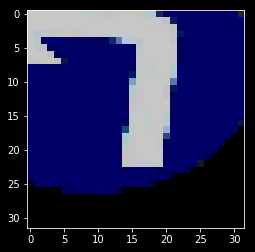

In [203]:
imshow(X_test[i, : ,: , :])

In [81]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1])

In [204]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


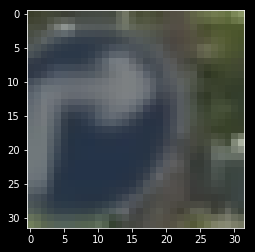

In [210]:
image = cv2.imread("/home/sonduong/catkin_ws/src/beginner_tutorials/scripts/sign_data_temp/64[[1.4752798]].png")
image = cv2.resize(image, (32,32))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imshow(image)

In [211]:
result = model.predict(np.array([image]))
result

array([[0.4626727]], dtype=float32)